<h1>Soal 1: Pemahaman</h1>

1. Sebutkan apa saja yang termasuk preprocessing data!
2. Jelaskan beberapa cara imputing missing value!
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

Jawab:
1. Dalam penerapannya kita bisa menggunakan scikit-learn untuk preprocessing data, dalam library scikit-learn ada banyak fungsi-fungsi yang tersedia. a) Binarization adalah ketika kita ingin mengubah variabel numerik kedalam nilai boolean (0 dan 1); b) Mean removal adalah cara umum dalam teknik preprocessing yang digunakan dalam machine learning, menghilangkan rata-rata biasanya sangat berguna dari variabel, jadi variabel berada ditengah tengah pada angka 0. kita melakukannya untuk menghilangkan bias dari variabel; c) Normalisasi untuk memodifikasi nilai dalam varabel sehingga kita dapat mengukurnya dalam skala umum. ; d) Label Encoding; e) Scalling
2. 5 cara menghandle missing value : a) Drop missing value untuk jumlah missing value data banyak; b) Filling with mean/median berlak untuk data yang bertipe numerik; c) Filling with modus berlaku untuk data yang bertipe kategori; d) Filling with bfill/fill; e) KNN
3. Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.
4. Mengambil dari resource data, selanjutnya dilakukan processing, modelling dan terakhir deploy. 

---

<h1>Soal 2: Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data [titanic.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data [titanic_test.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![alt text](https://drive.google.com/uc?id=1SyflO2YeuCdYhxwPF6CAtMeaNN1qTaFx)

In [1]:
# Code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_titanic = pd.read_csv('~/python/Sanbercode/Pekan 4/titanic.csv')
df_test = pd.read_csv('~/python/Sanbercode/Pekan 4/titanic_test.csv')

In [5]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Family_Size  891 non-null    int64   
 13  Alone        891 non-null    int64   
 14  Fare_Range   891 non-null    category
dtypes: category(1), float64(2), int64(7), object(5)
memory usage: 98.7+ KB


In [7]:
y_train = df_titanic.iloc[:, 1].values

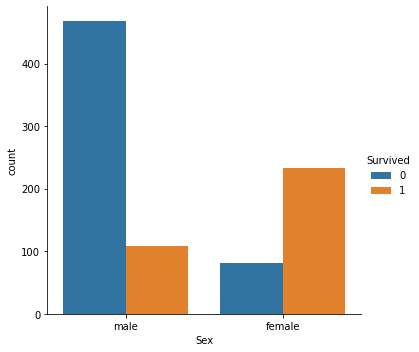

In [8]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = df_titanic) 

After observing the above graph, we can say that women were more likely to survived than men as they have high rate of survival than man. Hence, in determining whether a passenger will survive or not, gender(male or female) plays an important role.

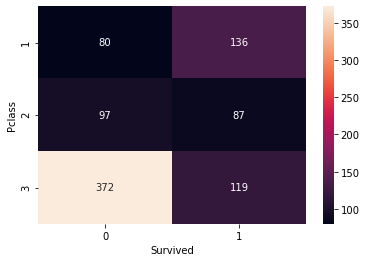

In [9]:
group = df_titanic.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

C:\Users\User\anaconda3\envs\python_3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\User\anaconda3\envs\python_3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


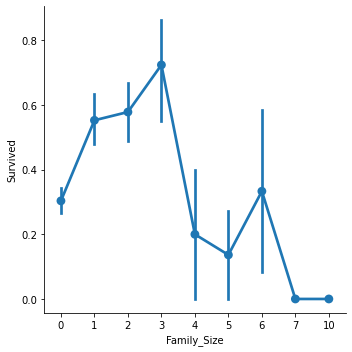

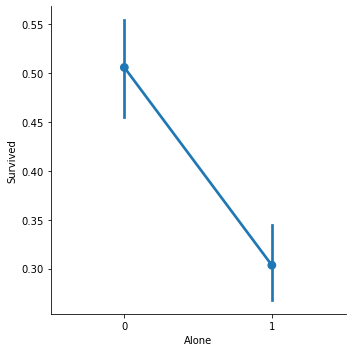

In [10]:
# Adding a column Family_Size 
df_titanic['Family_Size'] = 0
df_titanic['Family_Size'] = df_titanic['Parch']+df_titanic['SibSp'] 
  
# Adding a column Alone 
df_titanic['Alone'] = 0
df_titanic.loc[df_titanic.Family_Size == 0, 'Alone'] = 1
  
# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size', y ='Survived', data = df_titanic) 
  
# Factorplot for Alone 
sns.factorplot(x ='Alone', y ='Survived', data = df_titanic) 

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of alone passenger against the one with a family.

Important observations –
If a passenger is alone, the survival rate is less. If the family size is greater than 5, chances of survival decreases considerably.

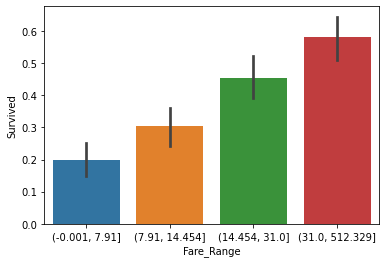

In [11]:
#Code : Bar Plot for Fare


# Divide Fare into 4 bins 
df_titanic['Fare_Range'] = pd.qcut(df_titanic['Fare'], 4) 
  
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='Fare_Range', y ='Survived', data = df_titanic)

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

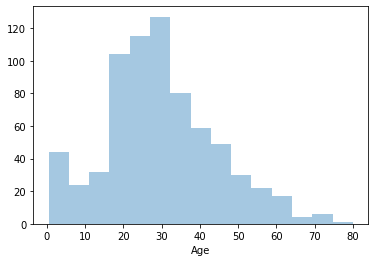

In [13]:
sns.distplot(df_titanic['Age'].dropna(), bins=15, kde=False)

Many passensgers are of age 15-40 yrs.

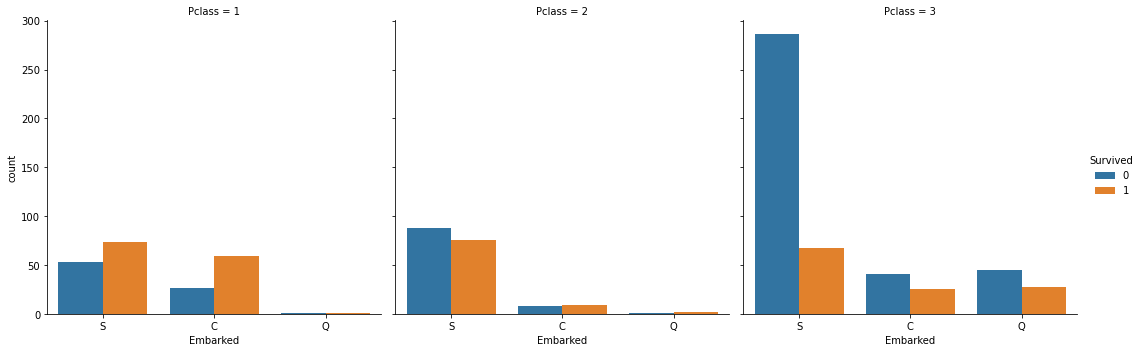

In [15]:
#Code : Categorical Count Plots for Embarked Feature


# Countplot 
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = df_titanic)

Some notable observations are:
- Majority of the passengers boarded from S.
- Majority of class 3 passengers boarded from Q.

<h2>Overall Conclusions from EDA:</h2>

1. Women survived more than men.
2. Class 1 passengers were more lucky than Class 2 and 3.
3. Unfortunately, Class 3 was most affected.
4. Alone passengers had less survival rate.
5. Survival rate is more for passengers who paid higher fare.
6. Most of the passangers were of age between 20-40.
7. Majority of the passengers were boarded from 'S'.

In [18]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(7.91, 14.454]"
